# <center>Статистические модели прогнозирования
# <center>Скользящее среднее
Для получения элементарного случая скользящего среднего проще всего взять среднее арифметическое двух последних наблюдений. Мы получим новый временной ряд, каждый член которого — среднее арифметическое двух соседних значений исходного ряда:
$$ MA_t = \frac{X_{t-1} + X_t}{2} $$
Чуть более продвинутый способ — усреднить сразу несколько наблюдений. Это так называемое **простое скользящее среднее (Simple Moving Average, SMA)**:
$$ SMA_t = \frac{X_{t-q+1} + \dots X_t}{q} $$
Таким образом, в скользящем среднем мы суммируем несколько последовательных точек временного ряда и делим эту сумму на количество самих точек, то есть считаем математическое усреднение за определённый период.

Количество точек для суммирования определяется **размером окна (q)**. Чем больше размер, тем больше данные сглаживаются.  
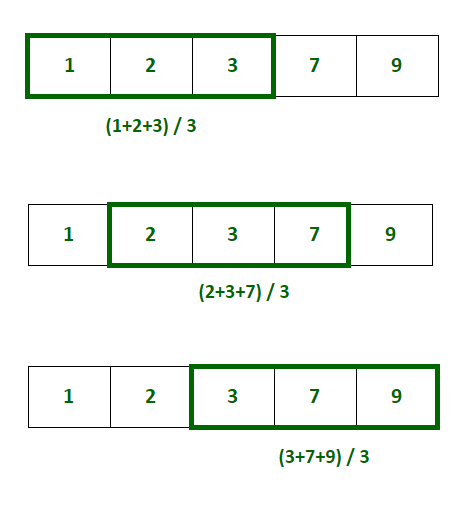

Для сглаживания мы будем использовать встроенный метод `pandas.Series.rolling()` — он принимает на вход параметр `window` и ожидает после себя агрегирующую функцию для сглаживания (обычно используется среднее). Из преимуществ этого метода можно отметить простоту реализации и интерпретации, из недостатков — чувствительность.

Посмотрим на некоторый временной ряд и результаты применения сглаживания к нему:  
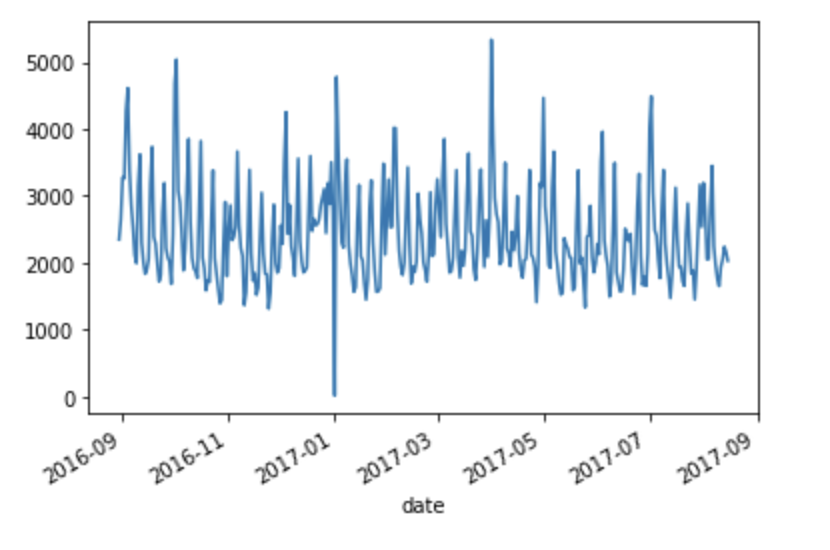

Скользящее среднее с узким окном (размер окна — два дня) неэффективно борется с выбросами.  
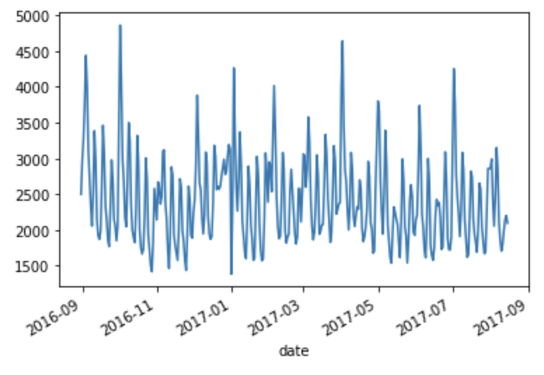

Скользящее среднее с широким окном (размер окна — 30 дней) может привести к потере информации, сгладив полезную информацию.  
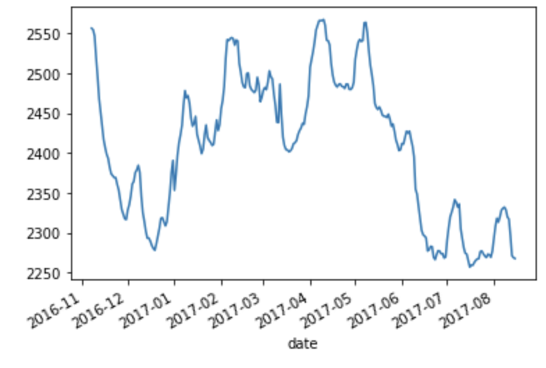

На данном графике с окном размера 15 есть прослеживающийся период и изменение амплитуды с течением времени.  
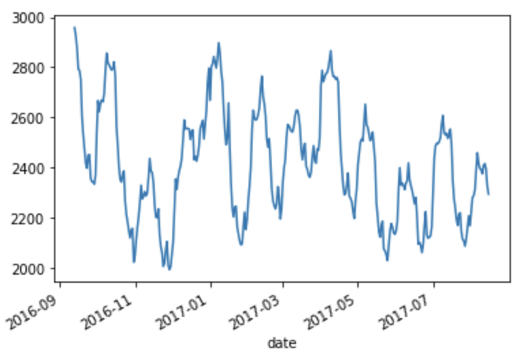

Модель скользящего среднего порядка (ширина окна) $q$ обозначается как $MA(q)$, а предсказание строится как значение белого шума в момент времени $t(\varepsilon_t)$ + скользящее среднее с окном размера $q$ (вычисляется как $\theta_1 \varepsilon_{t-1} + \dots + \theta_q \varepsilon_{t-q}$):
$$ X_t = \alpha + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \dots + \theta_q \varepsilon_{t-q} $$
где $\alpha$ и $\theta_q$ — неизвестные параметры, которые настраиваются в процессе обучения.

Скользящее среднее редко используется как самостоятельная модель, но иногда помогает избавить ряд от выбросов и лишнего шума, чтобы упростить визуальный анализ.


# <center>ARMA и ARIMA
>**ARMA** — это авторегрессионное скользящее среднее, или модель авторегрессии-скользящего среднего. В ней $p$ **авторегрессионных слагаемых** и $q$ **слагаемых скользящего среднего шумовой компоненты**:

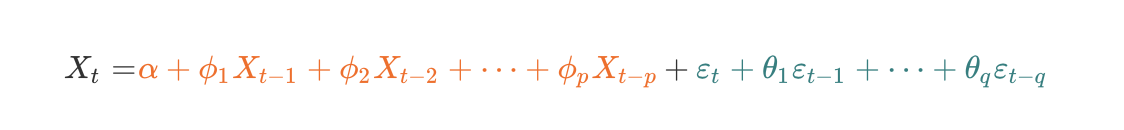

Таким образом ARMA объединяет преимущества двух ранее изученных методов и имеет два параметра:

* $p$ — параметр авторегрессионной модели $AR(p)$;
* $q$ — параметр скользящего среднего $MA(q)$.

Параметр $p$ мы определяли по графику частичной автокорреляции. Параметр $q$ для скользящего среднего определяют так же, но по коррелограмме (графику автокорреляции).

>**ARIMA** расшифровывается как *Autoregressive Integrated Moving Average* и включает в себя ещё один параметр ($d$), который означает, что дифференцирование временного ряда порядка $d$ приводит ряд к стационарности и будет подчиняться модели ARMA.

>$d$ — это  порядок дифференцирования, который приводит нестационарный ряд к стационарности. Это значит, что даже если наш ряд нестационарный, мы можем сделать его стационарным путём взятия разностей. Запомнив получившееся количество дифференцирований, можно смело применять к нему ARIMA.

И *ARMA*, и *ARIMA* реализованы на *Python* в классе `statsmodels.tsa.arima.model.ARIMA`. Данному классу необходимо передать в качестве параметров временной ряд и порядок `order` (`ARIMA(data, order=(2, 0, 0))`). Для параметра `order` нужно указать $p$, $d$ и $q$ (именно в таком порядке), причём для получения *ARMA* необходимо указать `d=0`.

Резюмируем:
* Если ряд стационарный, используем *ARMA*.
* Если ряд нестационарный (имеет тренд), с помощью дифференцирования определяем порядок $d$ и используем *ARIMA*.



# <center>SARIMA
Модель *ARIMA* отлично учитывает и тренд (благодаря скользящему среднему), и зависимость от предыдущих значений (благодаря авторегрессии), но в ней не хватает учёта сезонности. В таком случае можно добавить к *ARIMA* учёт сезонности, и тогда мы получим следующую модель — сезонную *ARIMA*, или **SARIMA (Seasonal ARIMA)**.

Эта модель очень похожа на *ARIMA*, за исключением того, что в ней есть дополнительный набор компонентов авторегрессии и скользящего среднего.

*SARIMA* позволяет различать данные по сезонной частоте, а также по их несезонным отличиям. Нахождение лучших для модели параметров можно упростить с помощью средств автоматического поиска, таких как [auto_arima](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html).

# <center>SARIMAX и ARIMAX
Что если месяц или день недели тоже имеет значение? Или, например, на курс рубля, помимо даты и предыдущих значений, также влияют курсы других валют?

Последней статистической моделью, с которой мы познакомимся, будет **SARIMAX**. Её отличие от предыдущей версии заключается в том, что, помимо данных временного ряда, она учитывает **экзогенные переменные** (те переменные, которые могут влиять на значения временного ряда). Таким образом мы сможем учитывать не только зависимости внутри данных, но и внешние факторы.

Для запуска моделей *SARIMA* и *SARIMAX* на *Python* нужно воспользоваться классом `statsmodels.tsa.statespace.sarimax.SARIMAX`. Если вы хотите использовать *SARIMA*, необходимо задать два обязательных параметра — `order` и `seasonal_order`.

`order` — это порядок для модели ($ARIMA(p, d, q)$). В `seasonal_order` необходимо передать ещё четыре параметра:
* `P` — сезонный авторегрессионный порядок;
* `D` — порядок дифференцирования сезонного ряда;
* `Q` — порядок сезонной скользящей средней;
* `m` — размер сезонного периода.

Если размер сезонного периода `m` можно определить по сезонной компоненте (мы уже раскладывали ряд на компоненты ранее — `seasonal_decompose`), то остальные параметры удобнее определять автоперебором.

Для учёта экзогенных переменных необходимо передать в класс *SARIMAX* параметр exog=x. В x должны находиться другие временные ряды, например курс доллара (x), который может влиять на курс рубля (y), или пометка, является ли каждая из дат праздничным днём.

Хороший пример реализации SARIMAХ приведён в [официальной документации](https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_sarimax_faq.html).

**ARIMAX**, в отличие от *SARIMAX*, *ARIMAX* не учитывает сезонную составляющую, но имеет все преимущества *ARIMA* и учитывает экзогенные переменные.



**КАК СРАВНИВАТЬ ЭТИ МОДЕЛИ?**

Одним из распространённых способов является сравнение качества моделей по **критерию Акаике (AIC)**. Этот информационный критерий вознаграждает модель за качество приближения обученного временного ряда к фактическому, а также «штрафует» её за использование излишнего количества параметров. Принято считать, что модель с наименьшим значением критерия *AIC* является наилучшей.

Для оценки модели критерием *AIC* необязательно пользоваться дополнительными методами. Этот критерий, как и другая информация, отображается после обучения модели при вызове встроенного метода `fit_model.summary()`.

**КАК ВЫБРАТЬ ПОДХОДЯЩУЮ МОДЕЛЬ?**
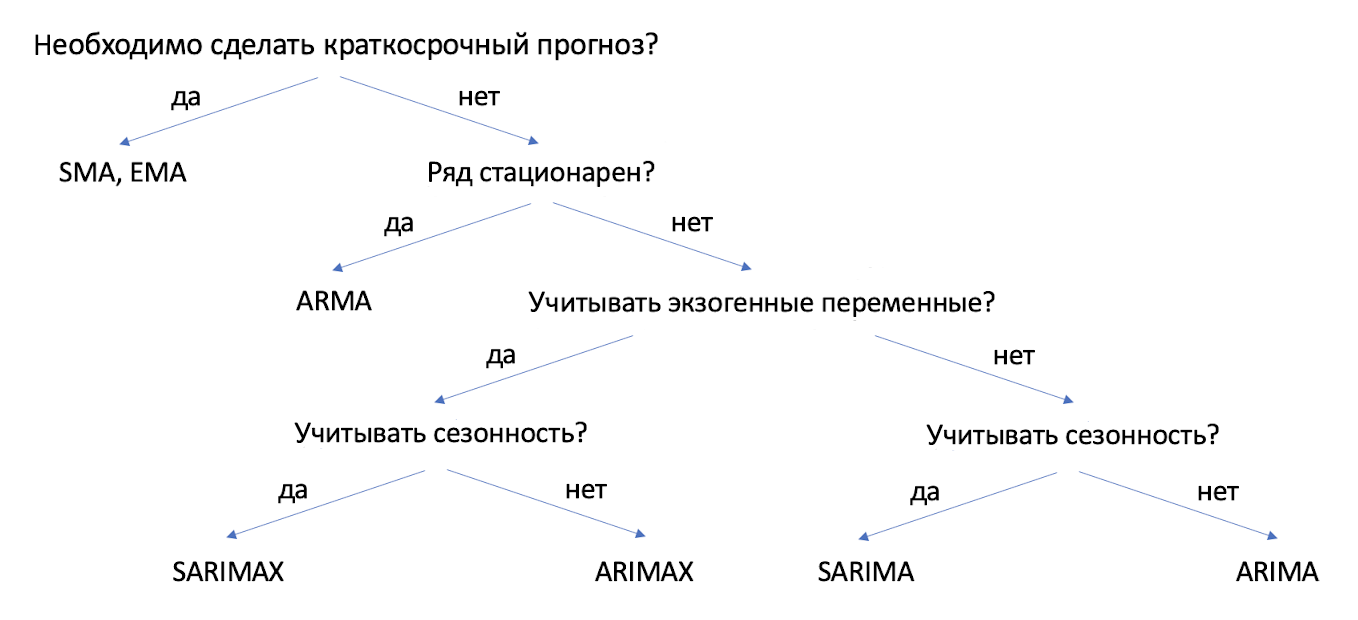
